In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 

def laplacian2D(M,dx):
    return (
        - 2 * M + np.roll(M,shift=+1,axis=0) + np.roll(M,shift=-1,axis=0) # second derivative in x
        - 2 * M + np.roll(M,shift=+1,axis=1) + np.roll(M,shift=-1,axis=1) # second derivative in y
    ) / (dx ** 2)
    
def show_patterns(U, ax=None):
    ax.imshow(U, cmap=plt.cm.copper,
              interpolation='bilinear')
    ax.set_axis_off()

In [19]:
#Simulation Parameters
Lx = 120
Ly = 40
dx = 1 #.*(10**3) / size  # space step
dt = .01  # time step
T = dt*50000 #total duration of the simulation
n = int(T / dt)  # number of iterations

  1%|▏         | 626/50000 [00:00<00:15, 3108.08it/s]

0.9761589227546165 0.9773825347998534


 21%|██        | 10382/50000 [00:03<00:12, 3133.37it/s]

9.670768298267441e-07 0.019360059351477166


 41%|████      | 20455/50000 [00:06<00:09, 3197.78it/s]

2.540897361040947e-11 0.009799750182976241


 61%|██████    | 30421/50000 [00:09<00:06, 3091.28it/s]

8.435108719797317e-16 0.006427181739099619


 81%|████████  | 40499/50000 [00:12<00:03, 3117.09it/s]

2.885241121859041e-20 0.004687809341413218


100%|██████████| 50000/50000 [00:16<00:00, 3123.66it/s]


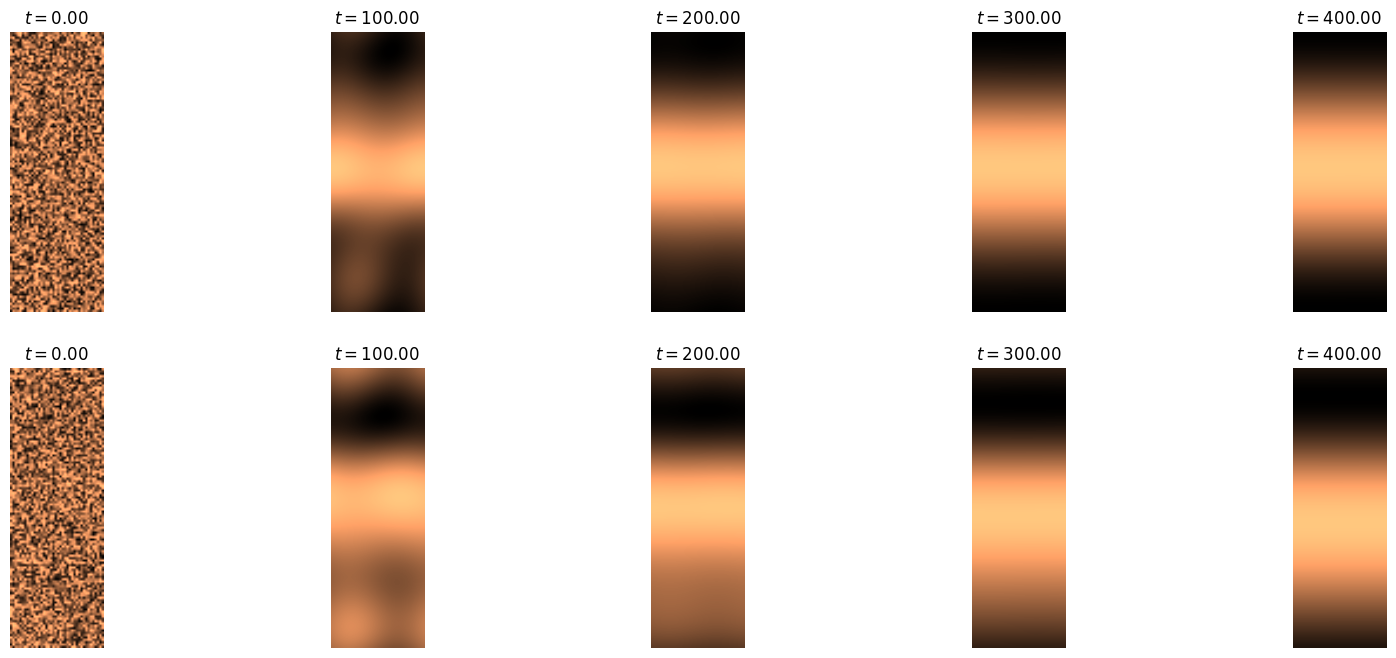

In [25]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
step_plot = n // 5

#Simulation Parameters
# Da = 0.08
# Ds = 0.16
# Db = 0.006
# Di = 0.12 
# ka = 0.0025
# ks = 0.003
# kb = 0.01875
# kappab = 0.2 #
# ki = 0.0375
# ha = 0.00025
# hs = 0.003
# hb = 0.00187
Da = 1
Ds = 1
Db = 1
Di = 1
ka = 0.1
ks = 0.1
kb = 1
kappab = 1
ki = 1
ha = 0
hs = 0
hb = 1

A = np.random.rand(Lx, Ly)
S = np.random.rand(Lx, Ly)
B = np.random.rand(Lx, Ly)
I = np.random.rand(Lx, Ly)
#Simulation Loop 
for i in tqdm(range(n), total=n):
    
    # We update the variables.
    DA = laplacian2D(A,dx)
    DS = laplacian2D(S,dx)
    DB = laplacian2D(B,dx)
    DI = laplacian2D(I,dx)
    dAdt = Da * DA + ka * (S * (A**2) - A) + ha
    dSdt = Ds * DS - ks * (S * (A**2)) + hs
    # dBdt = Db * DB + kb * (S**2) * np.power(1 + kappab * A * (B**2), -1) * (B**2/I + hb) - kb * B
    # dIdt = Di * DI + ki * (B**2 - I)
    
    A += dAdt * dt
    S += dSdt * dt
    # B += dBdt * dt
    # I += dIdt * dt
    

    # We plot the state of the system at different times.
    if i % step_plot == 0 and i < 5 * step_plot:
        ax = axes[0, i // step_plot]
        show_patterns(A, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')
        print(np.max(A)-np.min(A),np.max(S)-np.min(S))
        
        ax = axes[1, i // step_plot]
        show_patterns(S, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')

In [5]:
show_patterns(A, ax=ax)